In [ ]:
#Import library
import pandas as pd
import numpy as np
import datetime as data
import datetime as dt


#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#load data
df = pd.read_csv('/work/Assignment-1_Data.csv', delimiter=';')
df

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


# Data Pre-processing and Feature Engineer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
#convert Price column to float
df['Price'] = df["Price"].str.replace(',',".").astype('float')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# Assign the 'data' DataFrame to 'df'
# df = data

# Rename the column 'Itemname' to 'Item'
df = df.rename(columns={'Itemname':'Item'})

# Remove leading and trailing whitespaces from the 'Item' column
df['Item'] = df['Item'].str.strip()

# Filter out rows where 'Item' names start with a lowercase letter
df = df[df['Item'].apply(lambda x: not x[0].islower() if isinstance(x, str) and len(x) > 0 else True)]

# Remove rows where 'Item' names start with a question mark (?)
df = df[~df['Item'].str.startswith('?', na=False)]

# Drop rows with NaN values in the 'BillNo' column
df.dropna(axis=0, subset=['BillNo'], inplace=True)

# Convert 'BillNo' column to string type
df['BillNo'] = df['BillNo'].astype('str')

# Filter out rows where 'BillNo' contains the letter 'C'
df = df[~df['BillNo'].str.contains('C')]

# Count the number of unique items in the 'Item' column
df.Item.nunique()


4054

In [ ]:
df.isnull().sum()

BillNo             0
Item            1455
Quantity           0
Date               0
Price              0
CustomerID    133490
Country            0
dtype: int64

In [ ]:
#drop na in CustomerID 
df= df.dropna(subset=['CustomerID'])

df.shape

(388023, 7)

In [ ]:
df[df.duplicated() == True].Country.unique()

array(['United Kingdom', 'Germany', 'Australia', 'France', 'Spain',
       'Unspecified', 'Israel', 'Sweden', 'Portugal'], dtype=object)

In [ ]:
df[df['Country'] == 'United Kingdom'].shape

(354345, 7)

In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Sweden', 'Austria',
       'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel',
       'Saudi Arabia', 'Unspecified', 'Brazil', 'USA', 'Bahrain', 'Malta',
       'RSA'], dtype=object)

In [ ]:
example00 = df[df['Country'] == 'United Kingdom'].drop_duplicates()

In [ ]:
example00.shape

(349186, 7)

In [ ]:
#Check duplicate data
df.duplicated().sum()

5212

In [ ]:
#Remove duplicate data
num_duplicates = df.duplicated().sum()
if num_duplicates > 0: 
    df = df.drop_duplicates()
    print(f'Removed {num_duplicates} duplicates')

In [ ]:
df.describe()

,Quantity,Price,CustomerID
count,382811.000000,382811.000000,382811.000000
mean,13.026060,3.088636,15310.347702
std,183.823585,22.132049,1722.483516
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13928.500000
50%,6.000000,1.950000,15249.000000
75%,12.000000,3.750000,16820.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# df['Country'].value_counts()

In [ ]:
# #convert Date column to object type
# from datetime import datetime
# from datetime import timedelta
# convert_dict = {'Date': str}
# df = df.astype(convert_dict)
# print(data.dtypes)

In [ ]:
#Date: 01.12.2010 08:26
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M')
df['order_date'] = [d.date() for d in df['Date']]
df['order_time'] = [d.time() for d in df['Date']]
df.head()

,BillNo,Item,Quantity,Date,Price,CustomerID,Country,order_date,order_time
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [ ]:
# data = df
data = example00

In [ ]:
data.columns

Index(['BillNo', 'Item', 'Quantity', 'Date', 'Price', 'CustomerID', 'Country'], dtype='object')

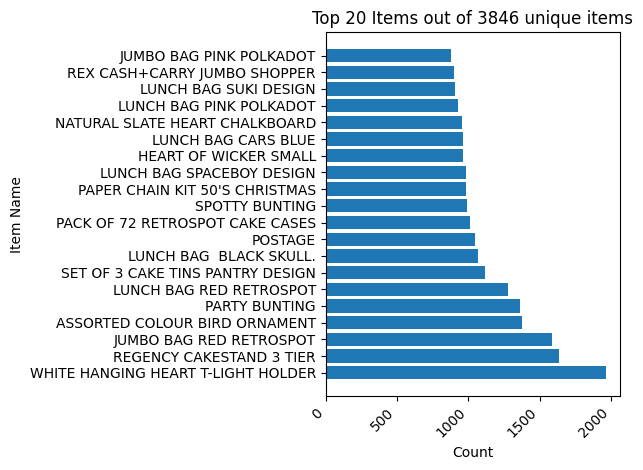

In [ ]:
# Assuming 'Itemname' is the column containing item names in your DataFrame
top_items = df['Item'].value_counts().head(20).sort_values(ascending=False)

# Plotting the horizontal bar chart
plt.barh(top_items.index,top_items.values)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Item Name')
plt.title('Top 20 Items out of 3846 unique items')

# Show the plot
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df[df['Quantity'] >=1]['Item'].nunique()

3846

# Feature Engineer

In [ ]:
# total_sales = data
# total_sales["Total_Revenue"] = total_sales["Price"] * total_sales["Quantity"]
# #total_sales.columns
# total_sales_per_customer = total_sales.groupby(["CustomerID", "Country"]).agg({"Total_Revenue": "sum"})
# total_sales_per_customer.head(10)

In [ ]:
total_sales = df
total_sales["Total_Revenue"] = total_sales["Price"] * total_sales["Quantity"]
#total_sales.columns
total_sales_per_customer = total_sales.groupby(["CustomerID",'Country']).agg({"Total_Revenue": "sum"})
total_sales_per_customer.head(10)

,,Total_Revenue
CustomerID,Country,
12346.0,United Kingdom,77183.60
12347.0,Iceland,4310.00
12349.0,Italy,1757.55
12350.0,Norway,334.40
12352.0,Norway,2506.04
12353.0,Bahrain,89.00
12354.0,Spain,1079.40
12355.0,Bahrain,459.40
12356.0,Portugal,2811.43


In [ ]:
total_sales_per_customer.reset_index(inplace=True)
total_sales_per_customer.sort_values(by = "Total_Revenue", ascending = False).head(10)

,CustomerID,Country,Total_Revenue
1664,14646.0,Netherlands,280206.02
4163,18102.0,United Kingdom,259657.30
3691,17450.0,United Kingdom,194390.79
2973,16446.0,United Kingdom,168472.50
44,12415.0,Australia,124914.53
3734,17511.0,United Kingdom,91062.38
2667,16029.0,United Kingdom,80850.84
0,12346.0,United Kingdom,77183.60
3141,16684.0,United Kingdom,66653.56
1267,14096.0,United Kingdom,65164.79


In [ ]:
data_fig = total_sales_per_customer.sort_values(by = "Total_Revenue", ascending = False)

fig = px.scatter(data_fig, x="CustomerID", y="Total_Revenue",
	         size="Total_Revenue", color="Country",
                 hover_name="Country", log_x=True, size_max=60, title="Top 100 Shoppers and Their Contries & Shopping Amounts")
fig.show()

# RFM - Recent Frequency Monetary Analysis

In [ ]:
data['TotalPrice'] = data['Quantity'] * data['Price']
data

,BillNo,Item,Quantity,Date,Price,CustomerID,Country,Total_Revenue,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,20.34,20.34
...,...,...,...,...,...,...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,09.12.2011 12:31,1.95,15804.0,United Kingdom,23.40,23.40
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,8,09.12.2011 12:49,2.95,13113.0,United Kingdom,23.60,23.60
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,09.12.2011 12:49,1.25,13113.0,United Kingdom,30.00,30.00
522047,581586,RED RETROSPOT ROUND CAKE TINS,24,09.12.2011 12:49,8.95,13113.0,United Kingdom,214.80,214.80


In [ ]:
print('Min Invoice Date:',data['order_date'].min(),'\nMax Invoice Date:',
       data['order_date'].max())
data.head(3)
snapshot_date = data['order_date'].max() + dt.timedelta(days=1)

snapshot_date

Min Invoice Date: 2010-12-01 
Max Invoice Date: 2011-12-09


datetime.date(2011, 12, 10)

In [ ]:
# create rfm table
# Recently: use order_date to count the number of days between hypothetical today and the last transaction
# Frequency: count the total BillNo
# Monetary: sum of totalPrice

rfm = data.groupby(['CustomerID'])\
        .agg({'order_date': lambda x : (snapshot_date - x.max()).days, \
            'BillNo':'count',\
            'TotalPrice': 'sum'})
    
rfm.rename(columns={'order_date':'Recency','BillNo':'Frequency','TotalPrice':'MonetaryValue'},\
        inplace= True)
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12349.0,19,73,1757.55
12350.0,311,17,334.40
12352.0,37,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [ ]:
#Building RFM segments
# Create range
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)

# Bin the 'Recency', 'Frequency', 'MonetaryValue' into four quantiles.
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)

# add new bin columns to the rfm
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,3,182,4310.00,4,4,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
12352.0,37,85,2506.04,3,3,4
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,4,1,1


In [ ]:
# Build RFM Segment and RFM Score
def add_rfm(x) : 
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,311,17,334.40,1,1,2,1.01.02.0,4
12352.0,37,85,2506.04,3,3,4,3.03.04.0,10


In [ ]:
# check the size of the segments
rfm.groupby(['RFM_Score']).size().sort_values(ascending=False)[:5]


RFM_Score
5     518
8     454
7     453
6     452
12    442
dtype: int64

In [ ]:
# group customers into Tier 1, Tier 2, Tier 3 segments:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Tier1'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Tier2'
    else:
        return 'Tier3'

In [ ]:
rfm['Segments'] = rfm.apply(segments,axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segments
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Tier2
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12,Tier1
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Tier1
12350.0,311,17,334.40,1,1,2,1.01.02.0,4,Tier3
12352.0,37,85,2506.04,3,3,4,3.03.04.0,10,Tier1
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Tier3
18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Tier3
18282.0,8,12,178.05,4,1,1,4.01.01.0,6,Tier2


In [ ]:
data_merged = pd.merge(data,rfm,on='CustomerID')
data_merged

,BillNo,Item,Quantity,Date,Price,CustomerID,Country,order_date,order_time,Total_Revenue,TotalPrice,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segments
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30,15.30,373,297,5391.21,1,4,4,1.04.04.0,9,Tier2
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Tier2
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00,22.00,373,297,5391.21,1,4,4,1.04.04.0,9,Tier2
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Tier2
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,20.34,373,297,5391.21,1,4,4,1.04.04.0,9,Tier2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382806,581578,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,15.00,15.00,1,38,848.55,4,2,3,4.02.03.0,9,Tier2
382807,581578,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,10.20,10.20,1,38,848.55,4,2,3,4.02.03.0,9,Tier2
382808,581578,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,10.20,10.20,1,38,848.55,4,2,3,4.02.03.0,9,Tier2
382809,581578,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,24.96,24.96,1,38,848.55,4,2,3,4.02.03.0,9,Tier2


# K-means Clustering

In [ ]:
rfm.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4297.000000,4297.000000,4297.000000,4297.000000
mean,93.137305,89.087968,1987.540843,7.495927
std,100.146581,208.869690,8584.801347,2.817715
min,1.000000,1.000000,0.000000,3.000000
25%,18.000000,17.000000,305.540000,5.000000
50%,51.000000,41.000000,664.260000,7.000000
75%,143.000000,98.000000,1647.260000,10.000000
max,374.000000,7673.000000,280206.020000,12.000000


In [ ]:
# Drop 0 values in Monetary since data was skew, log(0) ~ inf
rfm.replace(0, np.nan, inplace=True)
rfm.dropna(inplace=True)
rfm.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4296.000000,4296.000000,4296.000000,4296.000000
mean,93.155493,89.108473,1988.003493,7.496276
std,100.151141,208.889678,8585.747109,2.817951
min,1.000000,1.000000,3.750000,3.000000
25%,18.000000,17.000000,305.600000,5.000000
50%,51.000000,41.000000,664.300000,7.000000
75%,143.000000,98.000000,1647.315000,10.000000
max,374.000000,7673.000000,280206.020000,12.000000


In [ ]:
# Mean and Variance are not Equal -> Scaling variables
rfm_kmean = rfm[['Recency','Frequency','MonetaryValue']]
rfm_kmean.describe()

,Recency,Frequency,MonetaryValue
count,4296.000000,4296.000000,4296.000000
mean,93.155493,89.108473,1988.003493
std,100.151141,208.889678,8585.747109
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,305.600000
50%,51.000000,41.000000,664.300000
75%,143.000000,98.000000,1647.315000
max,374.000000,7673.000000,280206.020000


In [ ]:
# Unsymmetric distribution of variables (Data skewed)
# -> Logarithmic transformation
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segments
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Tier2
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12,Tier1
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Tier1
12350.0,311,17,334.40,1,1,2,1.01.02.0,4,Tier3
12352.0,37,85,2506.04,3,3,4,3.03.04.0,10,Tier1
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Tier3
18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Tier3
18282.0,8,12,178.05,4,1,1,4.01.01.0,6,Tier2


In [ ]:
# Logarithmic transformation
rfm_log = np.log(rfm_kmean)
rfm_log

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.786897,0.000000,11.253942
12347.0,1.098612,5.204007,8.368693
12349.0,2.944439,4.290459,7.471676
12350.0,5.739793,2.833213,5.812338
12352.0,3.610918,4.442651,7.826459
...,...,...,...
18280.0,5.627621,2.302585,5.196285
18281.0,5.198497,1.945910,4.392224
18282.0,2.079442,2.484907,5.182064


In [ ]:
# check inf value
np.isinf(rfm_log).sum()

Recency          0
Frequency        0
MonetaryValue    0
dtype: int64

In [ ]:
# Check null values
np.isnan(rfm_log).sum()

Recency          0
Frequency        0
MonetaryValue    0
dtype: int64

In [ ]:
# Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)

# Store  separately for clustering
rfm_normalized= scaler.transform(rfm_log)

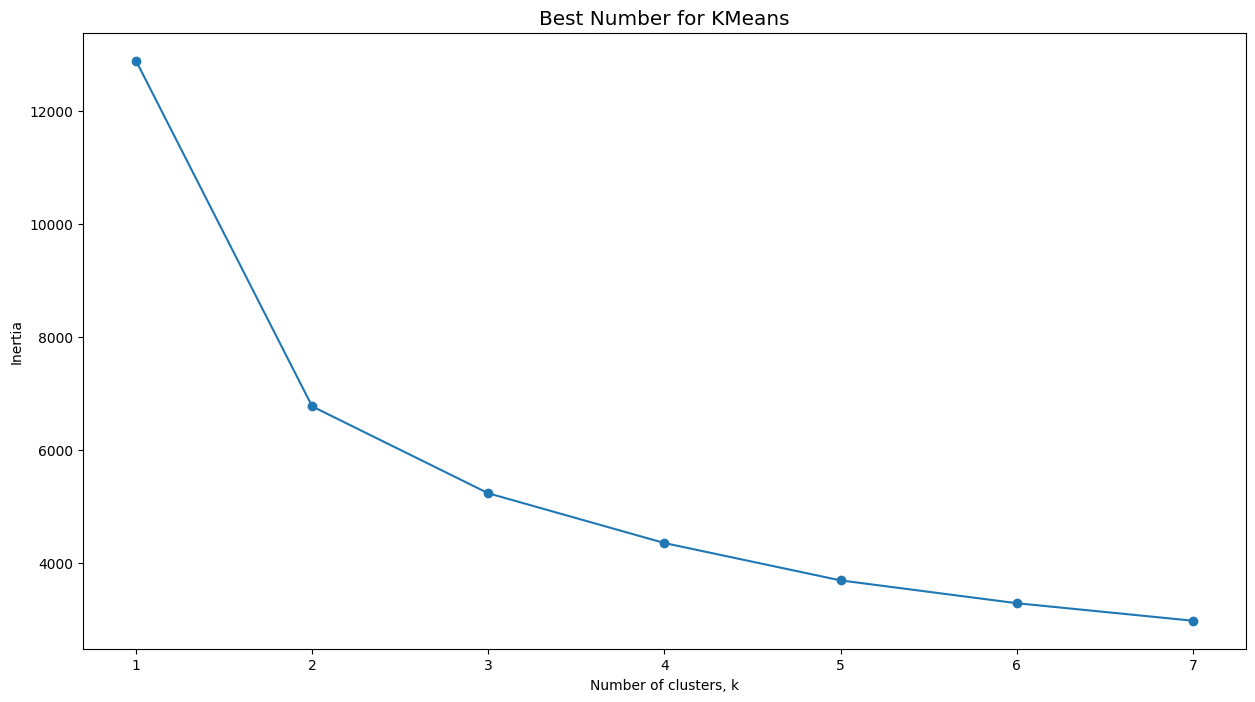

In [ ]:
# Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()


In [ ]:
# Clustering
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculate average RFM values and size for each cluster:
rfm_kmean_k3 = rfm_kmean.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_kmean_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],}).round(0)


Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0            14.0     256.0        6354.0   939
1           173.0      15.0         293.0  1521
2            68.0      65.0        1159.0  1836

In [ ]:
# Snake Plots to Understand and Compare Segments

# 1. Market research technique to compare different segments
# 2. Visual representation of each segment’s attributes
# 3. Need to first normalize data (center & scale)
# 4. Plot each cluster’s average normalized values of each attribute

rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm_kmean.index,columns=rfm_kmean.columns)
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['Segments'] = rfm['Segments']
rfm_normalized.reset_index(inplace = True)

# Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,\
                        id_vars=['CustomerID','Segments','K_Cluster'],\
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'],\
                        var_name='Metric',value_name='Value')
rfm_melt

,CustomerID,Segments,K_Cluster,Metric,Value
0,12346.0,Tier2,2,Recency,1.434214
1,12347.0,Tier1,0,Recency,-1.951364
2,12349.0,Tier1,2,Recency,-0.618427
3,12350.0,Tier3,1,Recency,1.400198
4,12352.0,Tier1,2,Recency,-0.137139
...,...,...,...,...,...
12883,18280.0,Tier3,1,MonetaryValue,-1.100126
12884,18281.0,Tier3,1,MonetaryValue,-1.740073
12885,18282.0,Tier2,1,MonetaryValue,-1.111444
12886,18283.0,Tier1,0,MonetaryValue,0.831610


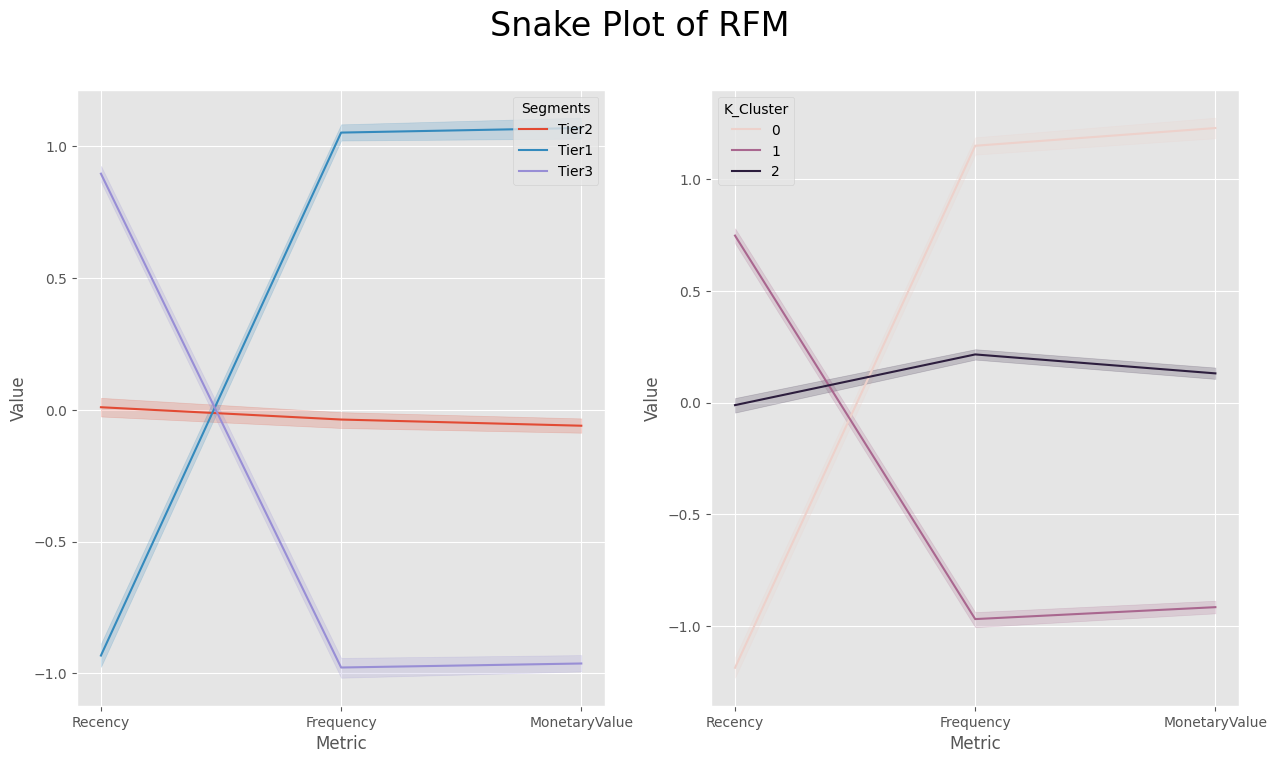

In [ ]:
# Snake Plot
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'Segments', data = rfm_melt, ax=ax1)

# snake plot with K-Means
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfm_melt,ax=ax2)
plt.suptitle("Snake Plot of RFM",fontsize=24) #make title fontsize subtitle 
plt.show()

# Market Basket Analysis

In [ ]:
# Create 3 tables for segments
Tier1 = data_merged[data_merged.Segments == 'Tier1']
Tier1

Tier2 = data_merged[data_merged.Segments == 'Tier2']
Tier2

Tier3 = data_merged[data_merged.Segments == 'Tier3']
Tier3

,BillNo,Item,Quantity,Date,Price,CustomerID,Country,order_date,order_time,Total_Revenue,TotalPrice,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segments
744,536374,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,2010-12-01,09:09:00,350.40,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Tier3
745,537767,VICTORIAN SEWING BOX LARGE,32,2010-12-08 12:09:00,10.95,15100.0,United Kingdom,2010-12-08,12:09:00,350.40,350.40,334,3,876.00,1,1,3,1.01.03.0,5,Tier3
746,540563,VICTORIAN SEWING BOX LARGE,16,2011-01-10 10:35:00,10.95,15100.0,United Kingdom,2011-01-10,10:35:00,175.20,175.20,334,3,876.00,1,1,3,1.01.03.0,5,Tier3
3668,536384,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074.0,United Kingdom,2010-12-01,09:53:00,19.35,19.35,374,13,489.60,1,1,2,1.01.02.0,4,Tier3
3669,536384,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom,2010-12-01,09:53:00,31.20,31.20,374,13,489.60,1,1,2,1.01.02.0,4,Tier3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378355,577755,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Tier3
378356,577755,PAPER CHAIN KIT VINTAGE CHRISTMAS,6,2011-11-21 14:49:00,2.95,17010.0,United Kingdom,2011-11-21,14:49:00,17.70,17.70,19,11,195.36,3,1,1,3.01.01.0,5,Tier3
378357,577755,MAGIC DRAWING SLATE DOLLY GIRL,24,2011-11-21 14:49:00,0.42,17010.0,United Kingdom,2011-11-21,14:49:00,10.08,10.08,19,11,195.36,3,1,1,3.01.01.0,5,Tier3
378358,577755,MINI PAINT SET VINTAGE,36,2011-11-21 14:49:00,0.65,17010.0,United Kingdom,2011-11-21,14:49:00,23.40,23.40,19,11,195.36,3,1,1,3.01.01.0,5,Tier3


# Tier 1

In [ ]:
Tier1

,BillNo,Item,Quantity,Date,Price,CustomerID,Country,order_date,order_time,Total_Revenue,TotalPrice,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segments
297,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,08:34:00,54.08,54.08,32,172,3237.54,3,4,4,3.04.04.0,11,Tier1
298,536367,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01,08:34:00,12.60,12.60,32,172,3237.54,3,4,4,3.04.04.0,11,Tier1
299,536367,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,2010-12-01,08:34:00,12.60,12.60,32,172,3237.54,3,4,4,3.04.04.0,11,Tier1
300,536367,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,2010-12-01,08:34:00,30.00,30.00,32,172,3237.54,3,4,4,3.04.04.0,11,Tier1
301,536367,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom,2010-12-01,08:34:00,9.90,9.90,32,172,3237.54,3,4,4,3.04.04.0,11,Tier1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381645,581405,36 FOIL STAR CAKE CASES,4,2011-12-08 13:50:00,0.79,13521.0,United Kingdom,2011-12-08,13:50:00,3.16,3.16,2,418,1071.73,4,4,3,4.04.03.0,11,Tier1
381646,581405,36 FOIL HEART CAKE CASES,2,2011-12-08 13:50:00,0.79,13521.0,United Kingdom,2011-12-08,13:50:00,1.58,1.58,2,418,1071.73,4,4,3,4.04.03.0,11,Tier1
381647,581405,GIANT 50'S CHRISTMAS CRACKER,2,2011-12-08 13:50:00,1.25,13521.0,United Kingdom,2011-12-08,13:50:00,2.50,2.50,2,418,1071.73,4,4,3,4.04.03.0,11,Tier1
381648,581405,RED RETROSPOT TISSUE BOX,4,2011-12-08 13:50:00,0.39,13521.0,United Kingdom,2011-12-08,13:50:00,1.56,1.56,2,418,1071.73,4,4,3,4.04.03.0,11,Tier1


In [ ]:
# Create a basket for Tier 1 
def one(x):
    if sum(x) == 0:
        return 0
    else:
        return 1

my_basket = pd.get_dummies(Tier1, columns=['Item'], prefix='')
my_basket.columns = my_basket.columns.str.replace('_', '')
my_basket.columns = my_basket.columns.str.replace('*', '')
my_basket = my_basket.drop(columns=['Quantity', 'Date', 'Price', 'Country', 'CustomerID'])
my_basket = my_basket.groupby('BillNo').agg(one)

my_basket.head(5)
 

KernelInterrupted: Execution interrupted by the Jupyter kernel.

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Itemname
10 COLOUR SPACEBOY PEN              4206.0
12 COLOURED PARTY BALLOONS          1615.0
12 DAISY PEGS IN WOOD BOX            198.0
12 EGG HOUSE PAINTED WOOD             58.0
12 HANGING EGGS HAND PAINTED          30.0
                                     ...  
ZINC T-LIGHT HOLDER STARS SMALL     3330.0
ZINC TOP  2 DOOR WOODEN SHELF          8.0
ZINC WILLIE WINKIE  CANDLE STICK    1833.0
ZINC WIRE KITCHEN ORGANISER           18.0
ZINC WIRE SWEETHEART LETTER TRAY      57.0
Length: 3703, dtype: float64

In [ ]:
# Check if the item is in the sets
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [ ]:
basket_tier1_sets = basket_tier1.copy.applymap(encode_units)
basket_tier1_sets.drop('POSTAGE', inplace=True, axis=1)
basket_tier1_sets.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Necessary libraries required for market basket analysis
!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
frequent_itemsets_tier1 = apriori(basket_tier1_sets,  min_support=0.07, use_colnames=True)
frequent_itemsets_tier1


/root/venv/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.074892,(ASSORTED COLOUR BIRD ORNAMENT)
1,0.105001,(JUMBO BAG RED RETROSPOT)
2,0.071772,(LUNCH BAG BLACK SKULL.)
3,0.088640,(LUNCH BAG RED RETROSPOT)
4,0.079278,(PARTY BUNTING)
5,0.093110,(REGENCY CAKESTAND 3 TIER)
6,0.107700,(WHITE HANGING HEART T-LIGHT HOLDER)


In [ ]:
#Build frequent itemsets
frequent_itemsets_tier1['length'] = frequent_itemsets_tier1['itemsets'].apply(lambda x: len(x))
frequent_itemsets_tier1  

rules_tier1 = association_rules(frequent_itemsets_tier1, metric="lift", min_threshold=1)
rules_tier1

#Products having 70% confidence likely to be purchased together
rules_tier1[(rules_tier1['lift'] >= 1) & (rules_tier1['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041747,0.047904,0.031205,0.747475,15.603535,0.029205,3.770299,0.976686


In [ ]:
frequent_itemsets_tier1

,support,itemsets,length
0,0.043603,(6 RIBBONS RUSTIC CHARM),1
1,0.039386,(60 TEATIME FAIRY CAKE CASES),1
2,0.030277,(72 SWEETHEART FAIRY CAKE CASES),1
3,0.055410,(ALARM CLOCK BAKELIKE GREEN),1
4,0.032217,(ALARM CLOCK BAKELIKE IVORY),1
...,...,...,...
128,0.035759,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",2
129,0.032049,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG RED RETR...",2
130,0.032723,"(LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPOT)",2
131,0.031205,"(LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT)",2


# Tier 2

In [ ]:
basket_tier2 = (Tier2.groupby(['BillNo', 'Itemname'])['Quantity']\
          .sum().unstack().reset_index().fillna(0)\
          .set_index('BillNo'))

basket_tier2.head() 
basket_tier2.copy = basket_tier2 
basket_tier2.copy.head() 
basket_tier2.copy = basket_tier2.copy.astype(int)
basket_tier2.copy.shape

(4611, 3523)

In [ ]:
basket_tier2

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_tier2_sets = basket_tier2.copy.applymap(encode_units)
basket_tier2_sets.drop('POSTAGE', inplace=True, axis=1)
basket_tier2_sets.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Tier 3

In [ ]:
basket_tier3 = (Tier3.groupby(['BillNo', 'Itemname'])['Quantity']\
          .sum().unstack().reset_index().fillna(0)\
          .set_index('BillNo'))

basket_tier3.head() 


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_tier3.copy = basket_tier3 
basket_tier3.copy = basket_tier3.copy.astype(int)
basket_tier3.copy.shape

(1697, 2818)

In [ ]:
basket_tier3_sets = basket_tier3.copy.applymap(encode_units)
basket_tier3_sets.drop('POSTAGE', inplace=True, axis=1)
basket_tier3_sets.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Collaborative Filtering for Tier 1 Segment

In [ ]:
# Co-occurence Matrix
CID_PN_matrix = Tier1.pivot_table(index = ["BillNo"], columns = ["Itemname"], 
                              values = "Quantity").fillna(0)

basket_tier1_set = CID_PN_matrix.applymap(encode_units)
basket_tier1_set_int = basket_tier1_set.astype(int)
coocM_Tier1 = basket_tier1_set_int.T.dot(basket_tier1_set_int)
x_Tier1 = pd.DataFrame(coocM_Tier1.idxmax()).reset_index()
x_Tier1.columns = ["A", "B"]
x_Tier1
r_Tier1 = x_Tier1[x_Tier1["A"] != x_Tier1["B"]]
r_Tier1.head(10)

,A,B
80,5 STRAND GLASS NECKLACE BLACK,5 STRAND GLASS NECKLACE AMETHYST
81,5 STRAND GLASS NECKLACE CRYSTAL,5 STRAND GLASS NECKLACE AMETHYST
142,AMBER FINE BEAD NECKLACE W TASSEL,5 STRAND GLASS NECKLACE AMETHYST
143,AMBER GLASS TASSLE BAG CHARM,3 WHITE CHOC MORRIS BOXED CANDLES
144,AMBER GLASS/SHELL/PEARL NECKLACE,5 STRAND GLASS NECKLACE AMETHYST
147,AMETHYST HOOP EARRING FLORAL LEAF,ABC TREASURE BOOK BOX
160,ANT SILVER PURPLE BOUDICCA RING,ANT SILVER LIME GREEN BOUDICCA RING
161,ANT SILVER TURQUOISE BOUDICCA RING,ANT SILVER LIME GREEN BOUDICCA RING
169,ANTIQUE GLASS PLACE SETTING,12 MESSAGE CARDS WITH ENVELOPES
172,ANTIQUE MID BLUE FLOWER EARRINGS,ALARM CLOCK BAKELIKE IVORY


In [ ]:
matrix_Tier1 = Tier1.pivot_table(index = ["BillNo"], columns = ["Itemname"], 
                              values = "Quantity")

matrix_Tier1.head(10)
whiteHeart = matrix_Tier1["WHITE HANGING HEART T-LIGHT HOLDER"]
whiteHeart.head()

BillNo
536367   NaN
536368   NaN
536369   NaN
536370   NaN
536376   NaN
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

In [ ]:
similarProductsW_Tier1 = matrix_Tier1.corrwith(whiteHeart)
similarProductsW_Tier1 = similarProductsW_Tier1.dropna()
df1 = pd.DataFrame(similarProductsW_Tier1)
df1.head(10)

/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning:

Degrees of freedom <= 0 for slice

/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning:

divide by zero encountered in divide



,0
Itemname,
10 COLOUR SPACEBOY PEN,0.739898
12 COLOURED PARTY BALLOONS,0.504545
12 DAISY PEGS IN WOOD BOX,0.294617
12 EGG HOUSE PAINTED WOOD,-0.500000
12 IVORY ROSE PEG PLACE SETTINGS,0.567932
12 MESSAGE CARDS WITH ENVELOPES,0.818496
12 PENCIL SMALL TUBE WOODLAND,0.566229
12 PENCILS SMALL TUBE RED RETROSPOT,0.776761
12 PENCILS SMALL TUBE SKULL,0.261792


In [ ]:
corrMatrix_Tier1 = matrix_Tier1.corr()
corrMatrix_Tier1.head()


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Itemname,,,,,,,,,,,,,,,,,,,,,
10 COLOUR SPACEBOY PEN,1.000000,0.996685,NaN,NaN,NaN,NaN,NaN,0.372452,0.683702,0.289271,...,NaN,NaN,NaN,0.996415,NaN,0.995935,NaN,0.997306,NaN,NaN
12 COLOURED PARTY BALLOONS,0.996685,1.000000,NaN,NaN,NaN,NaN,0.789006,0.643474,0.997241,0.986928,...,NaN,NaN,0.83224,NaN,NaN,0.534924,NaN,0.987998,NaN,NaN
12 DAISY PEGS IN WOOD BOX,NaN,NaN,1.0,NaN,NaN,0.5,1.000000,-0.077402,-0.051209,-0.117998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 EGG HOUSE PAINTED WOOD,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 HANGING EGGS HAND PAINTED,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
second_customer_Tier1 = matrix_Tier1.iloc[1].dropna()
second_customer_Tier1.head()

Itemname
BLUE COAT RACK PARIS FASHION      3.0
JAM MAKING SET WITH JARS          6.0
RED COAT RACK PARIS FASHION       3.0
YELLOW COAT RACK PARIS FASHION    3.0
Name: 536368, dtype: float64

In [ ]:
simProducts_Tier1 = pd.Series()

#Go through every product bought by second customer

for i in range(0, len(second_customer_Tier1.index)):
    print("Adding sims for " + second_customer_Tier1.index[i] + "....")

    #Retrieve similar products to the ones bought by customer 2
    sims_Tier1 = corrMatrix_Tier1[second_customer_Tier1.index[i]].dropna()

    #Scale to how many of the products were bought
    sims_Tier1 = sims_Tier1.map(lambda x: x * second_customer_Tier1[i])

    # Add to the list of similar products
    simProducts_Tier1 = simProducts_Tier1.append(sims_Tier1)

print("sorting...")



Adding sims for BLUE COAT RACK PARIS FASHION....
Adding sims for JAM MAKING SET WITH JARS....
Adding sims for RED COAT RACK PARIS FASHION....
Adding sims for YELLOW COAT RACK PARIS FASHION....
sorting...
/tmp/ipykernel_94/3292319238.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
simProducts_Tier1.sort_values(inplace = True, ascending = True)
print(simProducts_Tier1)

BLACK TEA,COFFEE,SUGAR JARS          -6.0
MULTICOLOUR RABBIT EGG WARMER        -6.0
ORIGAMI LAVENDER INCENSE/CANDL SET   -6.0
OVAL  MINI PORTRAIT FRAME            -6.0
WALL ART THE MAGIC FOREST            -6.0
                                     ... 
BLUE TEA TOWEL CLASSIC DESIGN         6.0
RED RETROSPOT STORAGE JAR             6.0
SAVE THE PLANET COTTON TOTE BAG       6.0
LOVE HEART SOCK HANGER                6.0
SKULLS PARTY BAG + STICKER SET        6.0
Length: 3736, dtype: float64


In [ ]:
# Sorting the results and avoiding duplicates
simProducts_Tier1.head

BLACK TEA,COFFEE,SUGAR JARS          -6.0
MULTICOLOUR RABBIT EGG WARMER        -6.0
ORIGAMI LAVENDER INCENSE/CANDL SET   -6.0
OVAL  MINI PORTRAIT FRAME            -6.0
WALL ART THE MAGIC FOREST            -6.0
dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=978e47be-7104-4b17-a630-cc41d018f568' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>